In [1]:
import mc_methods
import matplotlib.pyplot as plt
import numpy as np

from lib.envs.racetrack import RacetrackEnv
from collections import defaultdict

In [2]:
racetrack_filename = 'racetrack_01.txt'
file_dir = ''
racetrack_file = open(file_dir + racetrack_filename, 'r')
racetrack_grid = racetrack_file.read().splitlines()
racetrack_file.close()

In [3]:
env = RacetrackEnv(racetrack_grid)

In [4]:
Q, policy = mc_methods.mc_on_policy_control_epsilon_greedy(env, num_episodes=20, epsilon=0.1, Q_default=lambda: np.full(env.action_space.n, -float('inf')))

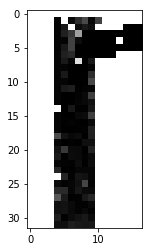

In [5]:
V = defaultdict(lambda: -float('inf'))
for state, action_values in Q.items():
    action_value = np.max(action_values)
    V[(state[0], state[1])] = max(V[(state[0], state[1])], action_value)

v_grid = [[V[(row, column)] for column in xrange(env.observation_space.shape[1][0])]
          for row in xrange(env.observation_space.shape[0][0])]

plt.imshow(v_grid, cmap='Greys')